# Homework 4: Functions, Histograms, and Sampling

**Reading**: Textbook chapters [7](https://www.inferentialthinking.com/chapters/07/Visualization), [8](https://www.inferentialthinking.com/chapters/08/functions-and-tables.html), and [9](https://www.inferentialthinking.com/chapters/09/Randomness) (Sections 9.1-9.3)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.  Homework 4 is due Wednesday, 10/31 at 2pm. Late work will not be accepted.  

NOTE: This homework uses data files of over a 1MB which might slow things down a bit depending on what system you run it on.

In [24]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. Working with Text using Functions (15 points)


The following table contains the words from four chapters of Charles Dickens' [*A Tale of Two Cities*](http://www.gutenberg.org/cache/epub/98/pg98.txt).  We're going to compute some simple facts about each chapter.  Since we're performing the same computation on each chapter, it's best to encapsulate each computational procedure in a function, and then call the function several times. Run the cell below to create a table with one column.

In [2]:
# Just run this cell to load the data.
tale_chapters = Table.read_table("tale.csv")
tale_chapters

Chapter text
"I. The Period It was the best of times, it was the wors ..."
"II. The Mail It was the Dover road that lay, on a Frid ..."
III. The Night Shadows A wonderful fact to reflect upo ...
IV. The Preparation When the mail got successfully to ...


**Question 1.** Write a function called `word_count` that takes a single argument, the text of a single chapter, and returns the number of words in that chapter.  Assume that words are separated from each other by spaces. 

*Hint:* Try the string method [`split`](https://docs.python.org/3/library/stdtypes.html#str.split) and the function [`len`](https://docs.python.org/3/library/functions.html#len).

In [3]:
def word_count(tale_chapter):
    return len(tale_chapter.split(" "))
word_count(tale_chapters.column("Chapter text").item(0))

911

**Question 2.** Use the `apply` function on the table from before to create an array called `chapter_lengths` which contains the length of each chapter in `tale_chapters`.

In [4]:
chapter_lengths = tale_chapters.apply(word_count,'Chapter text')
chapter_lengths

array([ 911, 1827, 1468, 3994])

**Question 3.** Write a function called `character_count`.  It should take a string as its argument and return the number of characters in that string that aren't spaces (" "), periods ("."), exclamation marks ("!"), or question marks ("?"). Remember that `tale_chapters` is a table, and that the function takes in only the text of one chapter as input.

*Hint:* Try using the string method `replace` several times to remove the characters we don't want to count.

In [5]:
def character_count(input_str):
    a=input_str.replace(" ", "")
    b=a.replace(".","")
    c=b.replace("!","")
    d=c.replace("?","")
    return len(d)
character_count("ABC... !?!")

3

**Question 4.** Write a function called `chapter_number`.  It should take a single argument, the text of a chapter from our dataset, and return the number of that chapter, as a Roman numeral.  (For example, it should return the string "I" for the first chapter and "II" for the second.)  If the argument doesn't have a chapter number in the same place as the chapters in our dataset, `chapter_number` can return whatever you like.

In [6]:
def chapter_number(full_text):
    return full_text[0:int(full_text.find('.'))]
chapter_number("IV. The Period It was the best of times, it was the world")

'IV'

**Question 5**. Write a command that creates a table that has a single column labled "Ch" that contains the Roman numeral for each of the chapters in our book.

In [7]:
tale_chapters = Table.read_table("tale.csv")
allChapNumbers=[]
for chapter in tale_chapters.column("Chapter text"):
    allChapNumbers.append(chapter_number(chapter))
t=Table().with_column("Ch", allChapNumbers)
t


Ch
I
II
III
IV


## 2. Uber (20 points)


Below we load tables containing 200,000 weekday Uber rides in the Manila, Philippines, and Boston, Massachusetts metropolitan areas from the [Uber Movement](https://movement.uber.com) project. The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride. The `hod` column in each table represents the hour of the day during which the Uber was called. 0 corresponds to 12-1 AM, 1 to 1-2 AM, 13 to 1-2 PM, etc. The `ride time` table contains the length of the ride, in minutes.

In [27]:
boston = Table.read_table("boston.csv")
manila = Table.read_table("manila.csv")
print("Boston")
boston.show(4)
print("Manila")
manila.show(4)

Boston


sourceid,dstid,hod,ride time
584,33,7,11.866
1013,1116,13,17.7993
884,1190,22,19.3488
211,364,1,1.7235


Manila


sourceid,dstid,hod,ride time
544,5,22,22.8115
302,240,21,7.02267
278,99,16,21.6437
720,775,18,13.0597


**Question 1.**
Produce histograms of all ride times in Boston and in Manila, using the given bins. Please put the code for both of them in the following cell, and put the ride times for Boston first.  

Text(0.5,1,'Ride Times')

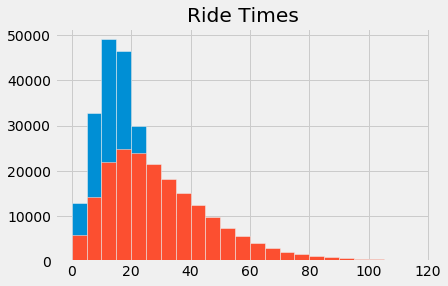

In [28]:
time_bins = np.arange(0, 120, 5)
plots.hist(boston["ride time"],time_bins)
plots.hist(manila["ride time"],time_bins)
plots.title('Ride Times')

** Question 2.** Set the two variables below to estimates of what percentage of rides are less than 10 minutes in Boston and Manila. Find your estimates by visually assessing the histograms. 

In [37]:
boston_under_10 = sum(boston.where(boston.column('ride time'), are.below(10)).column('ride time'))/sum(boston.column('ride time'))
manila_under_10 = sum(manila.where(manila.column('ride time'), are.below(10)).column('ride time'))/sum(manila.column('ride time'))

**Question 3.** Comment on the main difference between the two histograms. What might be causing this?

**Type Your Answer Here**: The main difference between the histograms is that the proportion of rides that are between 0 and 30ish minutes is far greater for boston than in manila. This could be that boston is a city and more people are communting within the city whereas people are taking longer trips in manila. 

**Question 4**. Draw a line graph that shows the number of rides (y-axis) vs hour of day (x-axis) for both cities (one line for each).

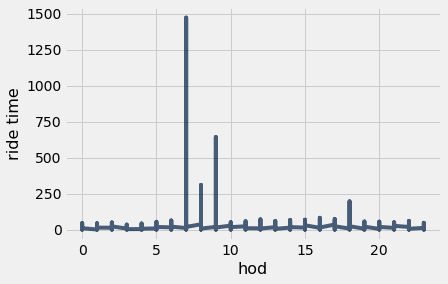

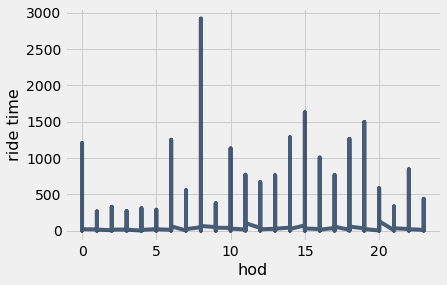

In [50]:
boston.plot('hod', 'ride time')
manila.plot('hod', 'ride time')

**Question 5.**  Write a function that takes in a table like `boston` or `manila`, and an `hod` number between 0 and 23, and displays a histogram of ride lengths from that hour in that city. Use the same bins as in Question 1.

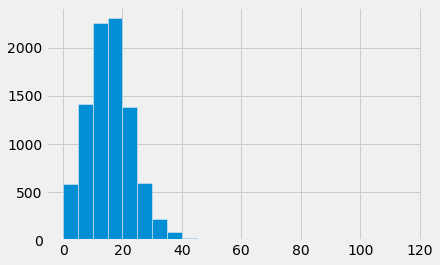

In [39]:
def hist_for_time(tbl, hod):
    time_bins = np.arange(0, 120, 5)
    sub_tbl = tbl.where(tbl.column('hod'), are.equal_to(hod))
    plots.hist(sub_tbl["ride time"],time_bins)

#DO NOT DELETE THIS LINE! 
hist_for_time(boston, 12)

**Question 6.** Between the two cities, which has a larger difference in ride times between Uber calls at 10 AM and 10 PM? You can use the function you just created to answer this question.  What might explain this? (show the code you ran in the first cell below and your text answer in the second).

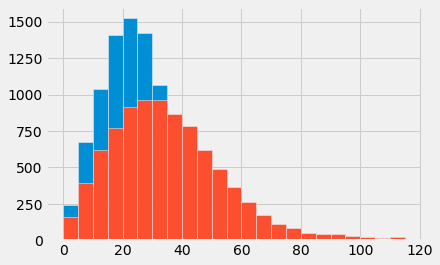

In [51]:
#Analysis code goes here

# hist_for_time(boston, 22)
# hist_for_time(boston, 10)

hist_for_time(manila, 22)
hist_for_time(manila, 10)

Manila has a larger difference in ride times. This could be explained by the difference of when people culturally call ubers. It may be more common to call an uber to get to work at 10am rather than 10pm. Also, perhaps there is a general attitude of being at home at 10pm rather than out, hence less rides. Less people out at night means less ubers needed at night.

## 3. Earthquakes (15 points)

The next cell loads a table containing information about every earthquake above a magnitude of 4.5 in 2017, compiled by the US Geological Survey. (source: https://earthquake.usgs.gov/earthquakes/search/)

In [11]:
earthquakes = Table().read_table('earthquakes_2017.csv').select(['time', 'mag', 'place'])
earthquakes

time,mag,place
2017-12-31T23:48:50.980Z,4.8,"30km SSE of Pagan, Northern Mariana Islands"
2017-12-31T20:59:02.500Z,5.1,Southern East Pacific Rise
2017-12-31T20:27:49.450Z,5.2,Chagos Archipelago region
2017-12-31T19:42:41.250Z,4.6,"18km NE of Hasaki, Japan"
2017-12-31T16:02:59.920Z,4.5,Western Xizang
2017-12-31T15:50:22.510Z,4.5,"156km SSE of Longyearbyen, Svalbard and Jan Mayen"
2017-12-31T14:53:32.590Z,5.1,"41km S of Daliao, Philippines"
2017-12-31T14:51:58.200Z,5.1,"132km SSW of Lata, Solomon Islands"
2017-12-31T12:24:13.150Z,4.6,"79km SSW of Hirara, Japan"
2017-12-31T04:02:18.500Z,4.8,"10km W of Korini, Greece"


There are a lot of earthquakes that occured over the year 2017 that are of interest, and generally, we won't have access to this large population. Instead, if we sample correctly, we can take a small subsample of earthquakes in this year to get an idea about the distribution of magnitudes throughout the year!

**Question 1**. In the following lines of code, we take two different samples from the earthquake table, and calculate the mean of the magnitudes of these earthquakes. Are these samples representative of the population of earthquakes in the original table (that is, the should we expect the mean to be close to the population mean)?   Justify your answer and state any assumptions you are making.

**Hint**: Consider the ordering of the earthquakes table.

In [15]:
sample1 = earthquakes.sort('mag', descending = True).take(np.arange(100))
sample1_magnitude_mean = np.mean(sample1.column('mag'))
sample2 = earthquakes.take(100)
sample2_magnitude_mean = np.mean(sample2.column('mag'))
[sample1_magnitude_mean, sample2_magnitude_mean]

[6.422999999999999, 4.8]

We want a representative sample of the population to be chosen randomly from the population. The first sample is not random, as it is sorted by magnitude. Therefore, taking the first 100 are the 100 largest in magnitude. It is not representative of all the earthquakes. This sample mean will be significantly larger than the population mean and I do not expect it to be close. 


The second sample is also not completely random as it takes the first 100 rows in the table. Looking at the table, it seems that the table is ordered in decreasing order by time. There may be some inherent bias in earthquakes during certain times of the year. But, for the sake of this question, I'm going to assume that the time of year does not afffect magnitude at all. So, this sample mean will be closer to the population mean as there is random variation in magnitude and place in the first 100.

Ultimately, I would suggest taking a random sample from the population across time, magnitudes, and place to get a sample mean close to the true population mean.


**Question 2.** Write code producing a sample of size 500 that represents the population, then take the mean of the magnitudes of the earthquakes in this sample. Assign these to `representative_sample` and `representative_mean` respectively. 

In [ ]:
representative_sample = earthquakes.take(np.arange(500))
representative_mean = np.mean(representative_sample.column('mag'))
representative_mean

**Question 3.** Suppose we want to figure out what the biggest magnitude earthquake was in 2017, but we are tasked with doing this only with a sample of 500 from the earthquakes table. 

To determine whether trying to find the biggest magnitude from a sample is a plausible idea, write code that simulates the maximum of a random sample of size 500 from the `earthquakes` table 5000 times. Assign your array of maximums to `maximums`. 

In [16]:
maximums = []
for i in np.arange(5000): 
    maximums.append(max(np.random.choice(earthquakes.column('mag'), 500)))

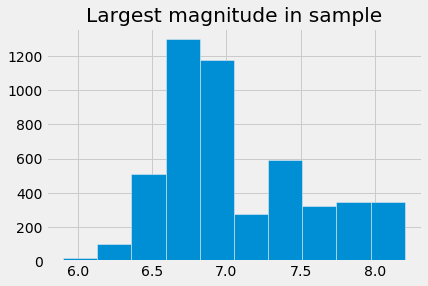

In [17]:
#Plot a Histogram of your maximums using the code below
plots.hist(maximums)
plots.title('Largest magnitude in sample')
plots.show() 

**Question 4.** Find the magnitude of the (actual) strongest earthquake in 2017 to help you determine your answer.

In [18]:
strongest_earthquake_magnitude = max(earthquakes.column('mag'))
strongest_earthquake_magnitude

8.2

**Question 5**. Based on your experiment above, is a random sample of size 500 likely to help you determine the largest magnitude earthquake in the population?  Why or why not? 

It's unlikely to help you determine the largest. The largest earthquake is likely to be an outlier, while there are many 4,5 magnitude earthquakes, there is only one largest, and very few large earthquakes. Therefore, our samples of 500 are unlikely to capture that highest magnitude earthquake in most of its samples. 

For example, in our histogram of maxes, the most common max was between 6.5 and 7, seconded by closer to 7.5. The highest magnitude, 8.2, was captured less often and not for most of the samples. The random sample size of 500 will not help determine the largest magnitude in the population. 